# ⁕BIG-MART SALES PREDICTION

### UNDERSTANDING OF THE PROBLEM STATEMENT:

According to the quote, "Success in sales is the sum of small efforts, repeated day in & day out"

Let us consider a supermarket has several outlets or several stores around the world & they want us to predict the sales which they can expect.

### APPLICATION OF PREDICTING THE SALES:

We can tell the company what are all the challenges they may face

What are the brands or products which is sold the most & other such kind of things

This helps sales team to understand which product to sell & which product to promote & other such kind of things

They can also make several marketing plans(let's say that a particular product in a particular store is getting sold the most & we may find some insights from it - as of why this product is getting sold the most & this helps the company to make better marketing decisions)

## IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import metrics

from warnings import filterwarnings
filterwarnings('ignore')
filterwarnings('always')

## Data Collection and Processing

In [2]:
#Read the data
df_train = pd.read_csv('Train.csv')

In [3]:
df_test = pd.read_csv("Test.csv")

In [4]:
df_train.shape,df_test.shape

((8523, 12), (5681, 11))

As said above we have 8523 rows and 12 columns in Train set whereas Test set has 5681 rows and 11 columns.

In [5]:
#See first 10 rows
df_train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [6]:
df_train.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [7]:
#print number of rows and columns separately for train

print("Number of Rows:",df_train.shape[0])
print("Number of Features:",df_train.shape[1])

Number of Rows: 8523
Number of Features: 12


In [8]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
#see dataset information
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Features 

### Numerical Features:

Item_Weight

Item_Visibility

Item_MRP

Outlet_Establishment_Year

Item_Outlet_Sales

### Categorical Features:

Item_Identifier

Item_Fat_Content

Item_Type

Outlet_Identifier

Outlet_Size

Outlet_Location_Type

Outlet_Type

### Columns that have null values:

Item_Weight

Outlet_Size

In [10]:
#Check for missing values
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## Handling Missing Values

#### Mean Method to handle Missing Values in Item_Weight

In [11]:
#Calculate Mean of Item_Weight column
df_train['Item_Weight'].mean()

12.857645184135976

In [12]:
#Fill missing values in Item_Weight column with mean
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(),inplace=True)

In [13]:
#Check for missing values
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#### Mode Method to handle Missing Values in Outlet_Size 

In [14]:
df_train['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [15]:
#Calculate mode of Outlet_Size column for each Outlet_Type in Outlet_Size
df_train.groupby('Outlet_Type')['Outlet_Size'].agg(pd.Series.mode)

Outlet_Type
Grocery Store         Small
Supermarket Type1     Small
Supermarket Type2    Medium
Supermarket Type3    Medium
Name: Outlet_Size, dtype: object

In [16]:
#Fill missing values in Outlet_Size column with mode of Outlet_Size column for each Outlet_Type in Outlet_Size
df_train.loc[df_train['Outlet_Type']=='Grocery Store','Outlet_Size']='Small'
df_train.loc[df_train['Outlet_Type']=='Supermarket Type1','Outlet_Size']='Small'
df_train.loc[df_train['Outlet_Type']=='Supermarket Type2','Outlet_Size']='Medium'
df_train.loc[df_train['Outlet_Type']=='Supermarket Type3','Outlet_Size']='Medium'

In [17]:
#Check for missing values
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Data Analysis

In [18]:
df_train['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

We see there are some irregularities in the column and it is needed to fix them!

In [19]:
df_train['Years_Established'] = df_train['Outlet_Establishment_Year'].apply(lambda x: 2020 - x) 
df_test['Years_Established'] = df_test['Outlet_Establishment_Year'].apply(lambda x: 2020 - x)

In [20]:
df_train['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)
df_test['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

In [21]:
df_train['Item_Fat_Content']= df_train['Item_Fat_Content'].astype(str)

In [22]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Small,Tier 1,Supermarket Type1,3735.1380,21
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,11
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Small,Tier 1,Supermarket Type1,2097.2700,21
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,22
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Small,Tier 3,Supermarket Type1,994.7052,33


## Univariate Analysis

### 1) Item Fat Content

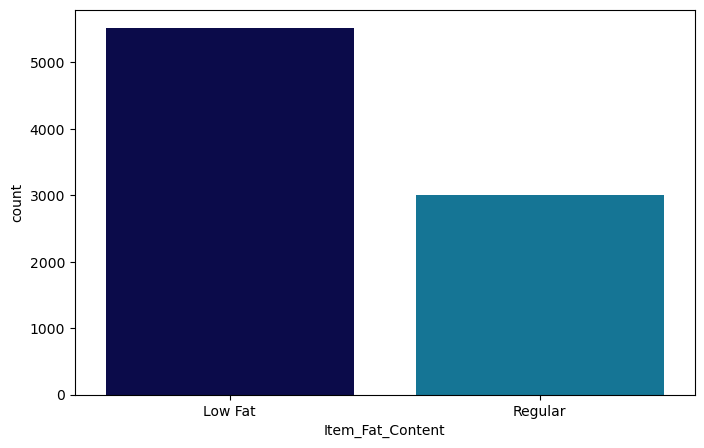

In [23]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Item_Fat_Content', data=df_train, palette='ocean')
plt.show()

#### Observations:
The Items bought are more of Low Fat.

### 2) Item Type

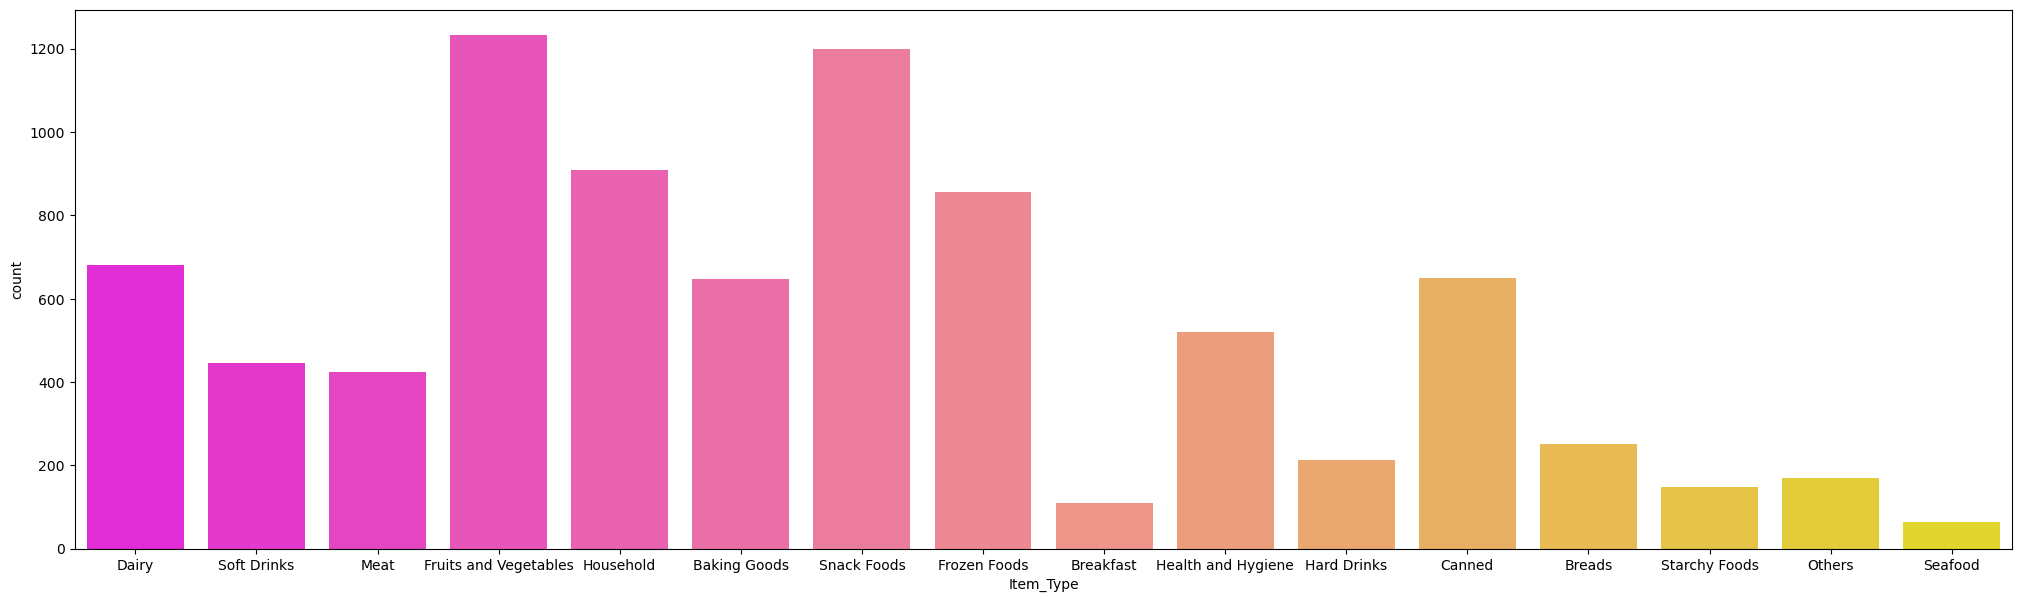

In [24]:
plt.figure(figsize=(25,7))
sns.countplot(x='Item_Type',data=df_train,palette='spring')
plt.show()

#### Observations:
Fruits and Vegetables are largely sold as people tend to use them on daily purpose.
Snack Foods too have good sales.

### 3) Outlet Size

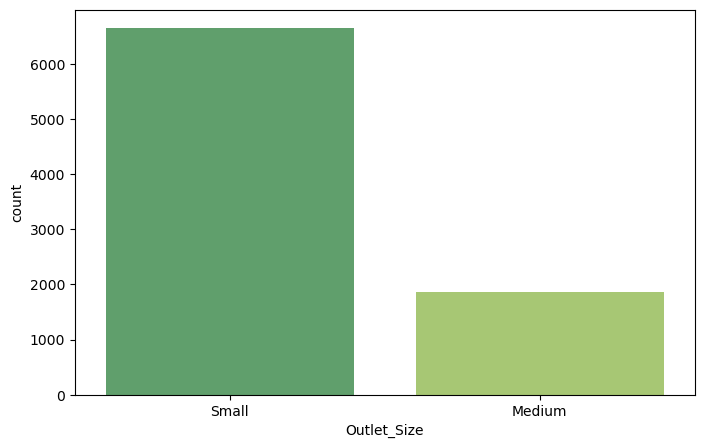

In [25]:
plt.figure(figsize=(8,5))
sns.countplot(x='Outlet_Size',data=df_train,palette='summer')
plt.show()

### 4) Outlet Location Type

<Axes: xlabel='Outlet_Location_Type', ylabel='count'>

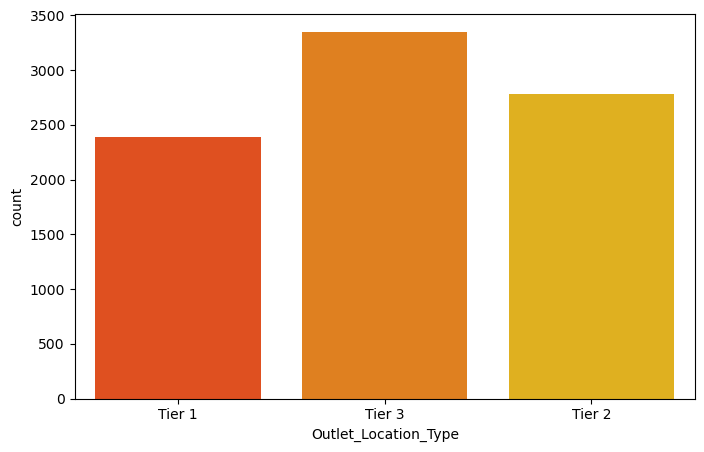

In [26]:
plt.figure(figsize=(8,5))
sns.countplot(x='Outlet_Location_Type',data=df_train,palette='autumn')

#### Observations:
The Outlets are maximum in number in Tier 3 Cities.

### 5) Outlet Type

<Axes: xlabel='Outlet_Type', ylabel='count'>

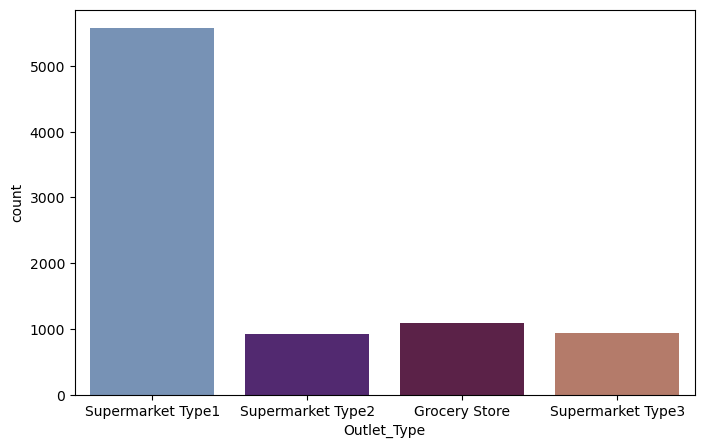

In [27]:
plt.figure(figsize=(8,5))
sns.countplot(x='Outlet_Type',data=df_train,palette='twilight')

#### Observations:
The Outlets are more of Supermarket Type1.

### 6) Outlet_Establishment_Year

<Axes: xlabel='Years_Established', ylabel='count'>

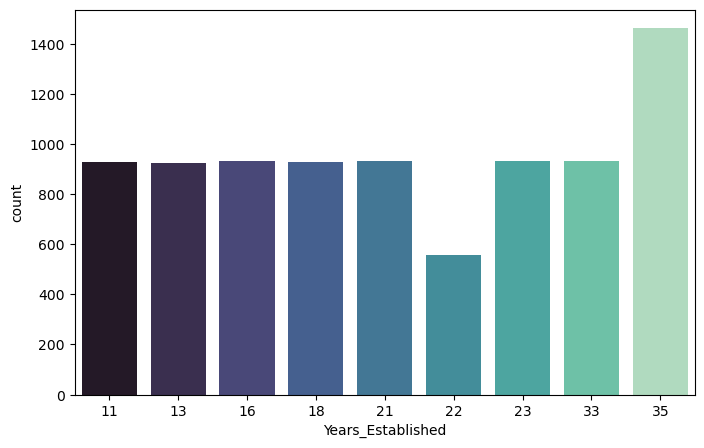

In [28]:
plt.figure(figsize=(8,5))
sns.countplot(x='Years_Established',data=df_train,palette='mako')

#### Observations:
The Outlets are more of established and running from 35 years.

## Bivariate Analysis

In [29]:
df_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Years_Established'],
      dtype='object')

### 1) Item Fat Content

<Axes: xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

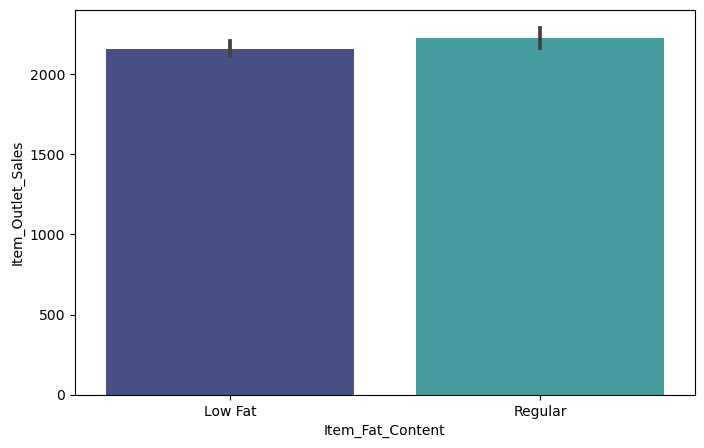

In [30]:
plt.figure(figsize=(8,5))
sns.barplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=df_train,palette='mako')

#### Observations:
The Item Outles sales are high for both Low Fat and Regular Item types.

### 2) Item Visibility

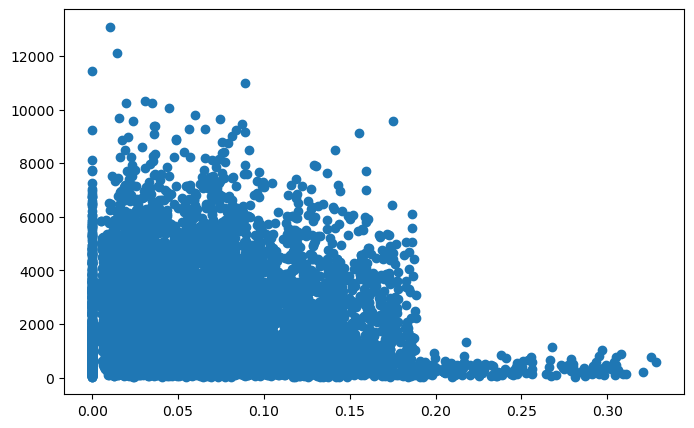

In [31]:
plt.figure(figsize=(8,5))
plt.scatter(x='Item_Visibility',y='Item_Outlet_Sales',data=df_train)

#### Observations:
Item_Visibility has a minimum value of zero. This makes no practical sense because when a product is being sold in a store, the visibility cannot be 0.

#### Lets consider it like missing information and impute it with mean visibility of that product.

In [32]:
df_train['Item_Visibility']=df_train['Item_Visibility'].replace(0,df_train['Item_Visibility'].mean())
df_test['Item_Visibility']=df_test['Item_Visibility'].replace(0,df_test['Item_Visibility'].mean())

Text(0, 0.5, 'Item Visibility')

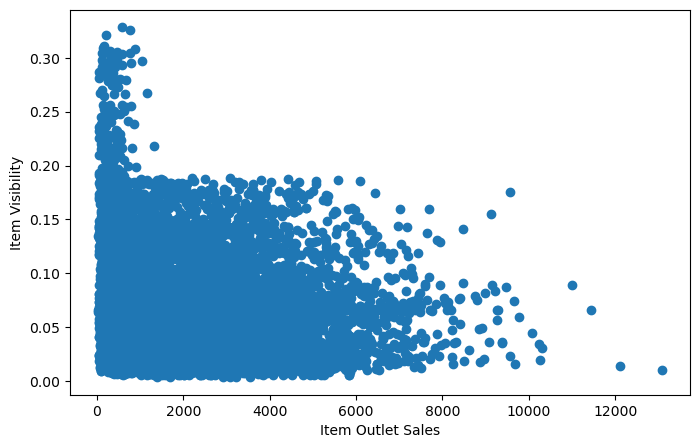

In [33]:
plt.figure(figsize=(8,5))
plt.scatter(y='Item_Visibility',x='Item_Outlet_Sales',data=df_train)
plt.xlabel('Item Outlet Sales')
plt.ylabel('Item Visibility')

#### We can see that now visibility is not exactly zero and it has some value indicating that Item is rarely purchased by the customers.

### 3) Item Type

<Axes: xlabel='Item_Outlet_Sales', ylabel='Item_Type'>

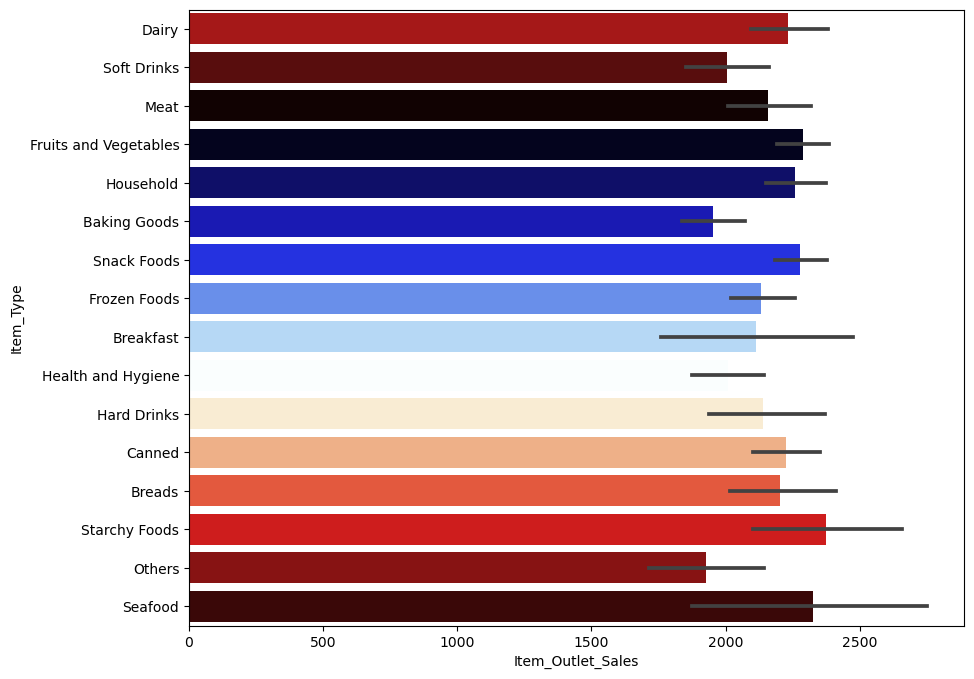

In [34]:
plt.figure(figsize=(10,8))
sns.barplot(y='Item_Type',x='Item_Outlet_Sales',data=df_train,palette='flag')

#### Observations:
The products available were Fruits-Veggies and Snack Foods but the sales of Seafood and Starchy Foods seems higher and hence the sales can be improved with having stock of products that are most bought by customers.

Text(0, 0.5, 'Item Outlet Sales')

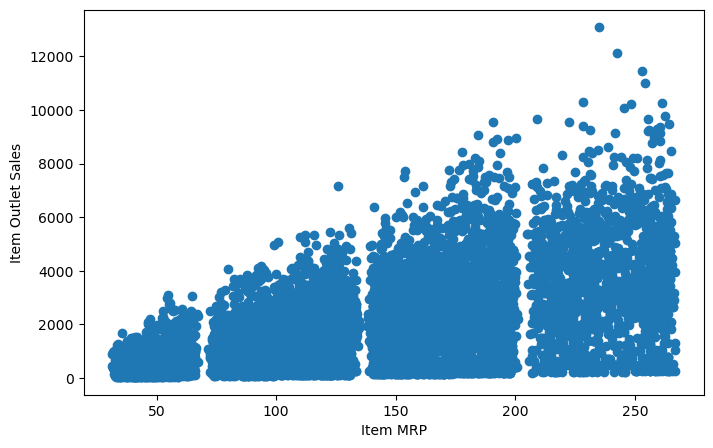

In [35]:
plt.figure(figsize=(8,5))
plt.scatter(y='Item_Outlet_Sales',x='Item_MRP',data=df_train)
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')

#### Observations:
Items MRP ranging from 200-250 dollars is having high Sales.

<Axes: xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

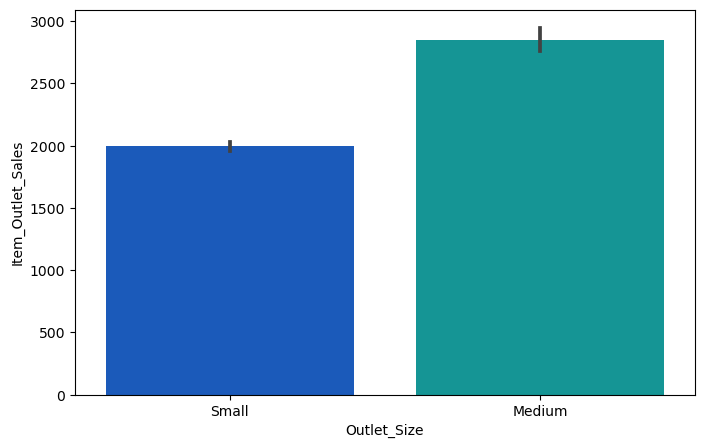

In [36]:
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',data=df_train,palette='winter')

#### Observations:
The Outlet Sales is maximum for Medium Outlets can improve the Outlet Sales.

<Axes: xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

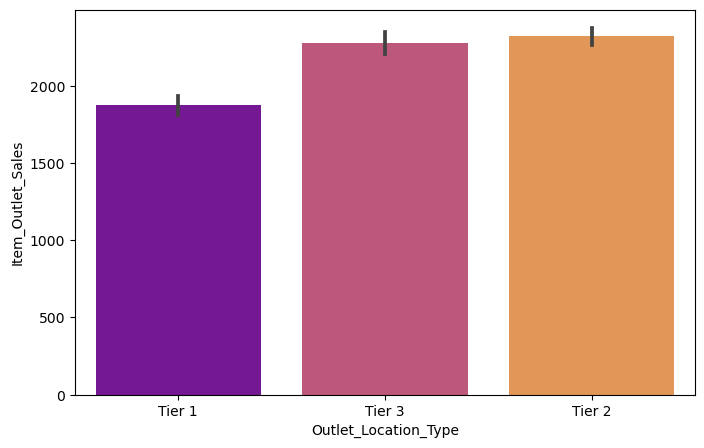

In [37]:
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=df_train,palette='plasma')

#### Observations:
The Outlet Sales tend to be high for Tier3 and Tier 2 location types but we have only Tier3 locations maximum Outlets.

<Axes: xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

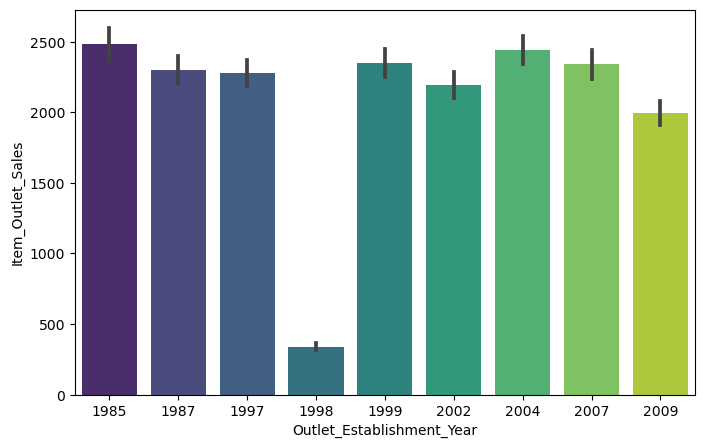

In [38]:
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',data=df_train,palette='viridis')

#### Observations:
It is quiet evident that Outlets established 35 years before is having good Sales margin.

We also have a outlet which was established before 22 years has the lowest sales margin, so established years wouldn't improve the Sales unless the products are sold according to customer's interest.

## Multivariate Analysis

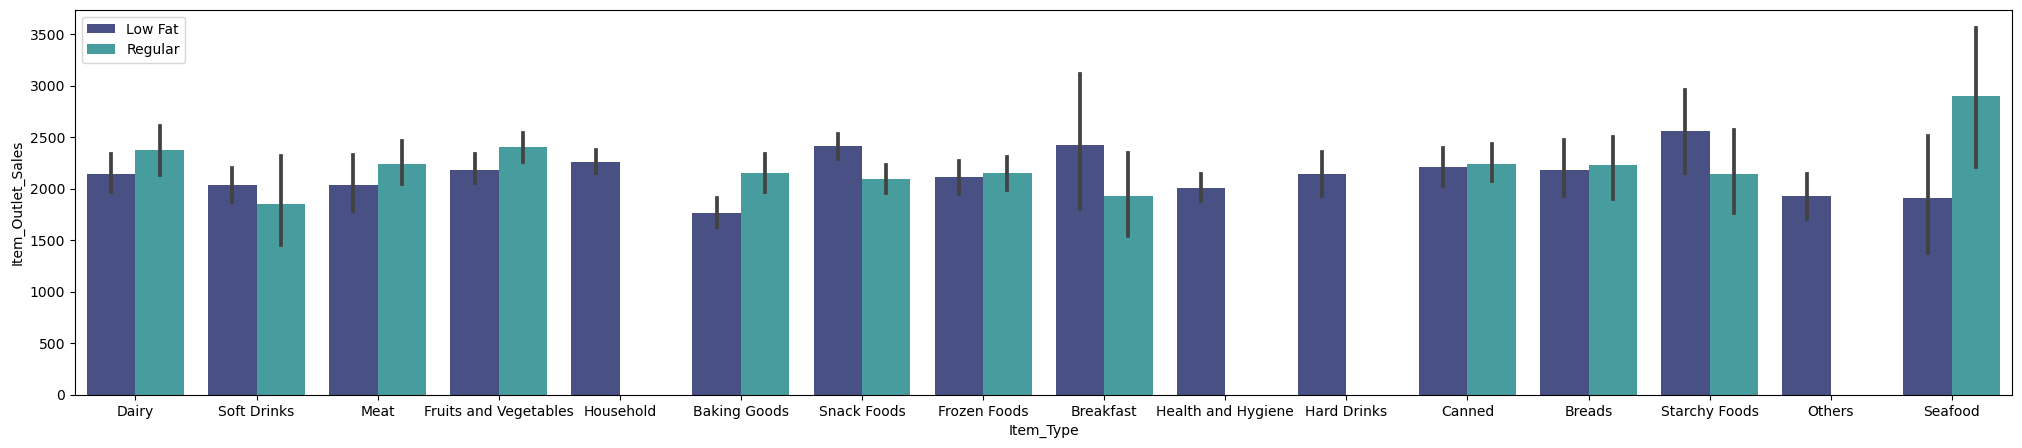

In [39]:
plt.figure(figsize=(25,5))
sns.barplot(x='Item_Type',y='Item_Outlet_Sales',hue='Item_Fat_Content',data=df_train,palette='mako')
plt.legend()

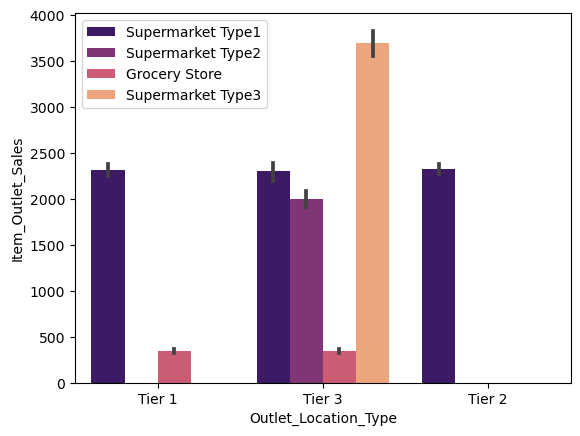

In [40]:
# plt.figure(figsize=(10,5))
sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',hue='Outlet_Type',data=df_train,palette='magma')
plt.legend()

#### Observations:
The Tier-3 location type has all types of Outlet type and has high sales margin.

## Feature Engineering

In [41]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Small,Tier 1,Supermarket Type1,3735.1380,21
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,11
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Small,Tier 1,Supermarket Type1,2097.2700,21
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,22
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,Small,Tier 3,Supermarket Type1,994.7052,33


In [42]:
le = LabelEncoder()
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type']

for i in var_mod:
    df_train[i] = le.fit_transform(df_train[i])
    
for i in var_mod:
    df_test[i] = le.fit_transform(df_test[i])

### Handle Categorical Features

In [43]:
#Apply Label Encoding on categorical columns
le = LabelEncoder()

df_train['Item_Fat_Content'] = le.fit_transform(df_train['Item_Fat_Content'])

df_train['Item_Type'] = le.fit_transform(df_train['Item_Type'])

df_train['Outlet_Size'] = le.fit_transform(df_train['Outlet_Size'])

df_train['Outlet_Location_Type'] = le.fit_transform(df_train['Outlet_Location_Type'])

df_train['Outlet_Type'] = le.fit_transform(df_train['Outlet_Type'])

df_train['Item_Identifier'] = le.fit_transform(df_train['Item_Identifier'])

df_train['Outlet_Identifier'] = le.fit_transform(df_train['Outlet_Identifier'])

In [44]:
df_train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,156,9.300000,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380,21
1,8,5.920000,1,0.019278,14,48.2692,3,2009,0,2,2,443.4228,11
2,662,17.500000,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700,21
3,1121,19.200000,1,0.066132,6,182.0950,0,1998,1,2,0,732.3800,22
4,1297,8.930000,0,0.066132,9,53.8614,1,1987,1,2,1,994.7052,33
5,758,10.395000,1,0.066132,0,51.4008,3,2009,0,2,2,556.6088,11
6,696,13.650000,1,0.012741,13,57.6588,1,1987,1,2,1,343.5528,33
7,738,12.857645,0,0.127470,13,107.7622,5,1985,0,2,3,4022.7636,35
8,440,16.200000,1,0.016687,5,96.9726,7,2002,1,1,1,1076.5986,18
9,990,19.200000,1,0.094450,5,187.8214,2,2007,1,1,1,4710.5350,13


In [45]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   int32  
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int64  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int32  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int64  
 9   Outlet_Location_Type       8523 non-null   int64  
 10  Outlet_Type                8523 non-null   int64  
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Years_Established          8523 non-null   int64  
dtypes: float64(4), int32(2), int64(7)
memory usage: 

## Data Scaling using StandardScaler

In [46]:
sc = StandardScaler()

df_train['Item_Weight'] = sc.fit_transform(df_train['Item_Weight'].values.reshape(-1,1))

df_train['Item_Visibility'] = sc.fit_transform(df_train['Item_Visibility'].values.reshape(-1,1))

df_train['Item_MRP'] = sc.fit_transform(df_train['Item_MRP'].values.reshape(-1,1))

df_train['Item_Outlet_Sales'] = sc.fit_transform(df_train['Item_Outlet_Sales'].values.reshape(-1,1))

df_train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,156,-0.841872,0,-1.111358,4,1.747454,9,1999,1,0,1,0.910601,21
1,8,-1.641706,1,-1.045067,14,-1.489023,3,2009,0,2,2,-1.018440,11
2,662,1.098554,0,-1.096733,10,0.010040,9,1999,1,0,1,-0.049238,21
3,1121,1.500838,1,-0.083740,6,0.660050,0,1998,1,2,0,-0.849103,22
4,1297,-0.929428,0,-0.083740,9,-1.399220,1,1987,1,2,1,-0.695373,33
5,758,-0.582754,1,-0.083740,0,-1.438734,3,2009,0,2,2,-0.952110,11
6,696,0.187501,1,-1.179193,13,-1.338238,1,1987,1,2,1,-1.076967,33
7,738,0.000000,0,1.174765,13,-0.533641,5,1985,0,2,3,1.079158,35
8,440,0.790926,1,-1.098230,5,-0.706908,7,2002,1,1,1,-0.647381,18
9,990,1.500838,1,0.497269,5,0.752008,2,2007,1,1,1,1.482212,13


## Seperate Features from Label

In [47]:
#sepertate features and target

Features = df_train.drop(columns=['Item_Outlet_Sales'])

Target = df_train['Item_Outlet_Sales']

In [48]:
Features

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Years_Established
0,156,-0.841872,0,-1.111358,4,1.747454,9,1999,1,0,1,21
1,8,-1.641706,1,-1.045067,14,-1.489023,3,2009,0,2,2,11
2,662,1.098554,0,-1.096733,10,0.010040,9,1999,1,0,1,21
3,1121,1.500838,1,-0.083740,6,0.660050,0,1998,1,2,0,22
4,1297,-0.929428,0,-0.083740,9,-1.399220,1,1987,1,2,1,33
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,-1.418084,0,-0.275551,13,1.180783,1,1987,1,2,1,33
8519,897,-1.059578,1,-0.476643,0,-0.527301,7,2002,1,1,1,18
8520,1357,-0.534243,0,-0.718672,8,-0.897208,6,2004,1,1,1,16
8521,681,-1.336444,1,1.538968,13,-0.607977,3,2009,0,2,2,11


In [49]:
Target

0       0.910601
1      -1.018440
2      -0.049238
3      -0.849103
4      -0.695373
          ...   
8518    0.349915
8519   -0.956402
8520   -0.579100
8521   -0.196725
8522   -0.829594
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

## Split data into train and test sets

In [50]:
#splittting data into training and testing data
Features_train,Features_test,Target_train,Target_test = train_test_split(Features,Target,test_size=0.2,random_state=42)

In [51]:
#print shape of features and training and testing data of features
print("Shape of Features:",Features.shape)
print("Shape of Features_train:",Features_train.shape)
print("Shape of Features_test:",Features_test.shape)

Shape of Features: (8523, 12)
Shape of Features_train: (6818, 12)
Shape of Features_test: (1705, 12)


In [52]:
#print shape of Target and training and testing data of Target
print("Shape of Target:",Target.shape)
print("Shape of Target_train:",Target_train.shape)
print("Shape of Target_test:",Target_test.shape)

Shape of Target: (8523,)
Shape of Target_train: (6818,)
Shape of Target_test: (1705,)


## Building Model

### Building XGBRegressor Model

In [53]:
#build model with XGBRegressor
XGBRModel = XGBRegressor()

#fit the model
XGBRModel.fit(Features_train,Target_train)

#predict the model
Target_pred = XGBRModel.predict(Features_test)

#calculate R-Squared
r2_score = metrics.r2_score(Target_test,Target_pred)
print("R-Squared:",r2_score)

#calculate Mean Absolute Error
mae = metrics.mean_absolute_error(Target_test,Target_pred)
print("Mean Absolute Error:",mae)

#calculate Mean Squared Error
mse = metrics.mean_squared_error(Target_test,Target_pred)
print("Mean Squared Error:",mse)

R-Squared: 0.5330041550877749
Mean Absolute Error: 0.45919802945383664
Mean Squared Error: 0.43590942065056926


### Building SVR Model

In [54]:
#build model with SVLRegressor
model = SVR()

#fit the model
model.fit(Features_train,Target_train)

#predict the model
Target_pred = model.predict(Features_test)

#calculate R-Squared
r2_score = metrics.r2_score(Target_test,Target_pred)
print("R-Squared:",r2_score)

#calculate Mean Absolute Error
mae = metrics.mean_absolute_error(Target_test,Target_pred)
print("Mean Absolute Error:",mae)

#calculate Mean Squared Error
mse = metrics.mean_squared_error(Target_test,Target_pred)
print("Mean Squared Error:",mse)


R-Squared: -0.02428548915422346
Mean Absolute Error: 0.7432954611122138
Mean Squared Error: 0.9561020703341037


### Building RandomForestRegressor Model

In [55]:
#build model with RandomForestRegressor
model = RandomForestRegressor()

#fit the model
model.fit(Features_train,Target_train)

#predict the model
Target_pred = model.predict(Features_test)

#calculate R-Squared
r2_score = metrics.r2_score(Target_test,Target_pred)
print("R-Squared:",r2_score)

#calculate Mean Absolute Error
mae = metrics.mean_absolute_error(Target_test,Target_pred)
print("Mean Absolute Error:",mae)

#calculate Mean Squared Error
mse = metrics.mean_squared_error(Target_test,Target_pred)
print("Mean Squared Error:",mse)

R-Squared: 0.5563112562942705
Mean Absolute Error: 0.4477245175030441
Mean Squared Error: 0.41415379885081366


### Building LinearRegression Model

In [56]:

# Splitting data into features and target for Linear Regression
Features_train, Features_test, Target_train, Target_test = train_test_split(Features, Target, test_size=0.2, random_state=42)

# Build the Linear Regression model
model = LinearRegression()

# Fit the Linear Regression model
model.fit(Features_train, Target_train)

# Predict using the Linear Regression model
Target_pred = model.predict(Features_test)

# Calculate R-Squared for Linear Regression
r2_score = metrics.r2_score(Target_test, Target_pred)
print("Linear Regression R-Squared:", r2_score)

# Calculate Mean Absolute Error for Linear Regression
mae = metrics.mean_absolute_error(Target_test, Target_pred)
print("Linear Regression Mean Absolute Error:", mae)

# Calculate Mean Squared Error for Linear Regression
mse = metrics.mean_squared_error(Target_test, Target_pred)
print("Linear Regression Mean Squared Error:", mse)

Linear Regression R-Squared: 0.5808185155629665
Linear Regression Mean Absolute Error: 0.4634524478657021
Linear Regression Mean Squared Error: 0.3912779096840514


In [57]:
df_test = pd.read_csv('Test.csv')
df_test.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
5,FDH56,9.800,Regular,0.063817,Fruits and Vegetables,117.1492,OUT046,1997,Small,Tier 1,Supermarket Type1
6,FDL48,19.350,Regular,0.082602,Baking Goods,50.1034,OUT018,2009,Medium,Tier 3,Supermarket Type2
7,FDC48,NaN,Low Fat,0.015782,Baking Goods,81.0592,OUT027,1985,Medium,Tier 3,Supermarket Type3
8,FDN33,6.305,Regular,0.123365,Snack Foods,95.7436,OUT045,2002,NaN,Tier 2,Supermarket Type1
9,FDA36,5.985,Low Fat,0.005698,Baking Goods,186.8924,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [58]:
df_test.shape

(5681, 11)

### PreProcessing test data

In [59]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [60]:
#see categories in Item_Fat_Content column
df_test['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: count, dtype: int64

In [61]:
#handle Item_Fat_Content column categories with replacement
df_test['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'},inplace=True)

In [62]:
#see categories in Item_Fat_Content column
df_test['Item_Fat_Content'].value_counts()


Item_Fat_Content
Low Fat    3668
Regular    2013
Name: count, dtype: int64

In [63]:
#Apply Label Encoding on categorical columns
le = LabelEncoder()

df_test['Item_Fat_Content'] = le.fit_transform(df_test['Item_Fat_Content'])

df_test['Item_Type'] = le.fit_transform(df_test['Item_Type'])

df_test['Outlet_Size'] = le.fit_transform(df_test['Outlet_Size'])

df_test['Outlet_Location_Type'] = le.fit_transform(df_test['Outlet_Location_Type'])

df_test['Outlet_Type'] = le.fit_transform(df_test['Outlet_Type'])

df_test['Item_Identifier'] = le.fit_transform(df_test['Item_Identifier'])

df_test['Outlet_Identifier'] = le.fit_transform(df_test['Outlet_Identifier'])

In [64]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   int32  
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   int32  
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   int32  
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   int32  
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                5681 non-null   int32  
 9   Outlet_Location_Type       5681 non-null   int32  
 10  Outlet_Type                5681 non-null   int32  
dtypes: float64(3), int32(7), int64(1)
memory usage: 333.0 KB


In [65]:
sc = StandardScaler()

df_test['Item_Weight'] = sc.fit_transform(df_test['Item_Weight'].values.reshape(-1,1))

df_test['Item_Visibility'] = sc.fit_transform(df_test['Item_Visibility'].values.reshape(-1,1))

df_test['Item_MRP'] = sc.fit_transform(df_test['Item_MRP'].values.reshape(-1,1))

df_test.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,1.726792,0,-1.134077,13,-0.536555,9,1999,1,0,1
1,1067,-0.942389,1,-0.531850,4,-0.868937,2,2007,3,1,1
2,1406,0.408281,0,0.661316,11,1.629848,0,1998,3,2,0
3,809,-1.153565,0,-0.981416,13,0.226697,2,2007,3,1,1
4,1184,NaN,1,1.032540,4,1.508110,5,1985,1,2,3
5,461,-0.620801,1,-0.036424,6,-0.386289,8,1997,2,0,1
6,604,1.426643,1,0.330115,0,-1.471108,3,2009,1,2,2
7,266,NaN,0,-0.973726,0,-0.970235,5,1985,1,2,3
8,668,-1.370101,1,1.125541,13,-0.732638,7,2002,3,1,1
9,170,-1.438706,0,-1.170496,0,0.742175,2,2007,3,1,1
